<a href="https://colab.research.google.com/github/sobieddch90/mcd_udg_tfm-egg_analysis/blob/main/Alzheimer_Open_Neuro_EEG_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alzheimer EEG Analysis

- Author: Elmo Chavez
- Date:   05-Jun-2023

## Dataset Description
This dataset contains the EEG resting state-closed eyes recordings from 88 subjects in total.

Participants:
- 36 of them were diagnosed with Alzheimer's disease (AD group)
- 23 were diagnosed with Frontotemporal Dementia (FTD group)
- 29 were healthy subjects (CN group).

Cognitive and neuropsychological state was evaluated by the international Mini-Mental State Examination (MMSE). MMSE score ranges from 0 to 30, with lower MMSE indicating more severe cognitive decline.

The duration of the disease was measured in months and the median value was 25 with IQR range (Q1-Q3) being 24 - 28.5 months. Concerning the AD groups, no dementia-related comorbidities have been reported.

The average MMSE was:
- For the AD group was 17.75 (sd=4.5)
- For the FTD group was 22.17 (sd=8.22)
- For the CN group was 30.

The mean age:
- AD group was 66.4 (sd=7.9)
- FTD group was 63.6 (sd=8.2)
- CN group was 67.9 (sd=5.4).

Source Dataset:\
[Open Neuro: Alzheimer's disease, Frontotemporal dementia and Healthy subjects](https://openneuro.org/datasets/ds004504/versions/1.0.5)


## Workshop
description here



---


## Libraries

**OPEN NEURO**\
A Python client for accessing OpenNeuro datasets.\
https://pypi.org/project/openneuro-py/


Installing Open Neuro package:

Using a local environment with conda requires several packages before install Openneuro. Please make sure you already installed the following packages:

- ```conda install -c anaconda jupyter```
- ```conda update ipywidgets```
- ```conda install -c conda-forge tqdm```

Pip:
```
pip install openneuro-py
```
Conda:
```
conda install -c conda-forge openneuro-py
```

**MNE**\
Open-source Python package for exploring, visualizing, and analyzing human neurophysiological data: MEG, EEG, sEEG, ECoG, NIRS, and more.\
https://mne.tools/stable/index.html

Pip:
```
pip install mne
```
Conda:
```
conda create --strict-channel-priority --channel=conda-forge --name=mne mne-base
conda install -c conda-forge mne-base
```
*Suggestion*: Create a new conda environment to install MNE

In [1]:
%%capture
!pip install openneuro-py
!pip install mne

## Read and Explore the Data

Downloading the dataset directly from the website using openneuro package.

**PD**: *running the download command may take around 2 minutes or more.*

In [2]:
!mkdir /content/alzheimer_dataset

In [3]:
import openneuro as on

dataset_id = "ds004504"
output_dir = "/content/alzheimer_dataset"

on.download(dataset=dataset_id, target_dir=output_dir)


👋 Hello! This is openneuro-py 2022.4.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds004504 …


📁 Traversing directories for ds004504 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 357 files (5 concurrent downloads). 
✅ Finished downloading ds004504.
 
🧠 Please enjoy your brains.
 


In [4]:
import mne
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

### Preprocessed and Unprocessed Data Provided

The unprocessed EEG recordings are included in folders named: sub-0XX.

Folders named sub-0XX in the subfolder derivatives contain the preprocessed and denoised EEG recordings.\
The preprocessing pipeline of the EEG signals is as follows. First, a Butterworth band-pass filter 0.5-45 Hz was applied and the signals were re-referenced to A1-A2

Data No Preprocessed

In [6]:
path = os.getcwd()+'/alzheimer_dataset/sub-001/eeg/'
filename = 'sub-001_task-eyesclosed_eeg.set'

raw_unprocessed = mne.io.read_raw_eeglab(path+filename, preload=True)
raw_unprocessed.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>

In [7]:
raw_unprocessed.describe()

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV      -466.11     -78.71     -11.18      57.08    1192.97
 1  Fp2   EEG   µV      -423.54     -82.47     -16.85      43.12    2879.64
 2  F3    EEG   µV      -318.95     -71.69     -20.56      30.66     240.28
 3  F4    EEG   µV      -171.29      73.13     121.09     168.31     442.43
 4  C3    EEG   µV      -280.81     -66.50     -23.54      18.90     243.80
 5  C4    EEG   µV      -288.23     -23.93      21.68      66.02     347.22
 6  P3    EEG   µV      -242.87     -18.02      27.59      72.36     278.76
 7  P4    EEG   µV      -203.27      35.69      92.97     150.34     452.98
 8  O1    EEG   µV      -249.02      70.02     155.42     268.55     710.30
 9  O2    EEG   µV      -292.38     -38.82      19.48      88.33     439.11
10  F7    EEG   µV      -350.68     -64.79     -13.04      38.53     302

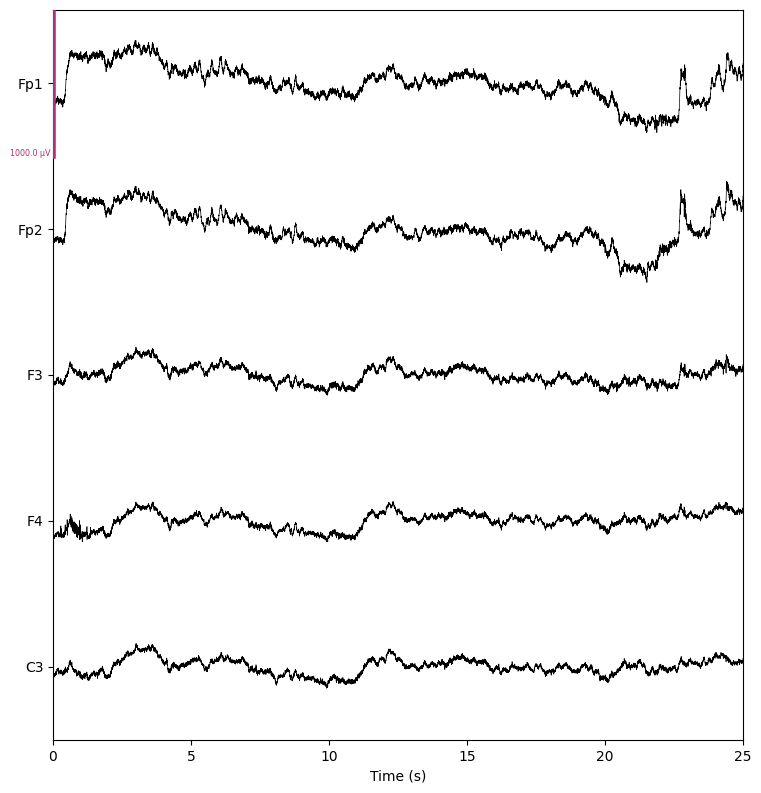

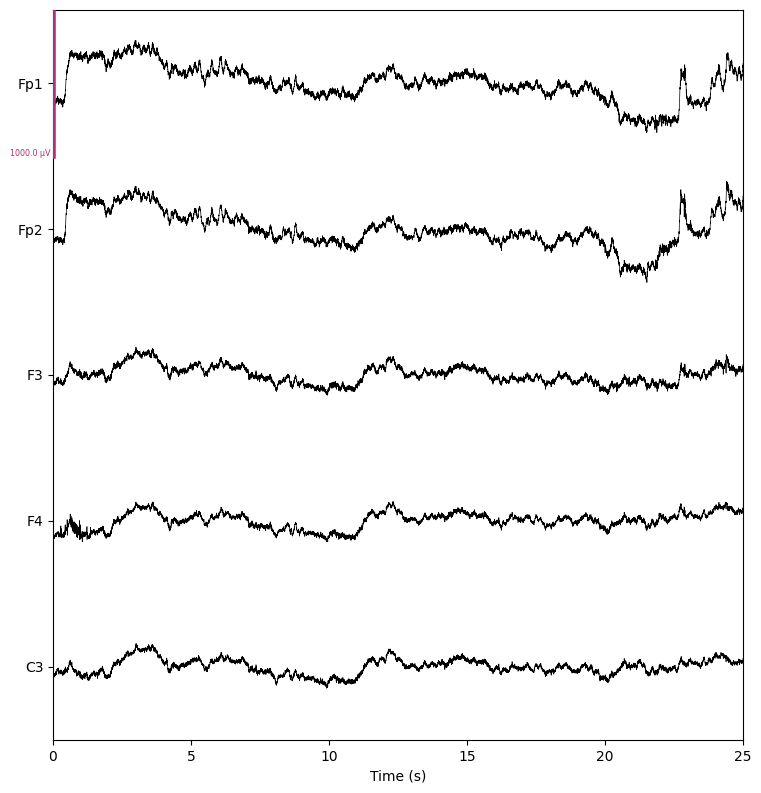

In [11]:
raw_unprocessed.plot(show_scrollbars=False, show_scalebars=True, scalings=dict(eeg=5e-4), n_channels=5, duration=25)

Data Preprocessed

In [12]:
path = os.getcwd()+'/alzheimer_dataset/derivatives/sub-001/eeg/'
filename = 'sub-001_task-eyesclosed_eeg.set'

raw = mne.io.read_raw_eeglab(path+filename, preload=True)
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>

In [13]:
raw.describe()

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV      -161.52     -21.98       0.20      22.28     143.65
 1  Fp2   EEG   µV      -137.61     -21.79       0.29      22.22     148.81
 2  F3    EEG   µV      -126.39     -21.31       0.34      21.33     140.30
 3  F4    EEG   µV      -126.99     -21.21       0.38      21.46     149.70
 4  C3    EEG   µV      -126.59     -21.16       0.51      21.34     139.82
 5  C4    EEG   µV      -128.02     -21.16       0.47      21.42     145.65
 6  P3    EEG   µV      -124.71     -21.44       0.43      21.53     143.70
 7  P4    EEG   µV      -126.30     -21.42       0.45      21.61     137.40
 8  O1    EEG   µV      -127.03     -21.79       0.57      21.54     146.38
 9  O2    EEG   µV      -128.01     -21.88       0.35      21.90     152.92
10  F7    EEG   µV      -125.56     -21.20       0.27      21.63     139

In [14]:
df = raw.to_data_frame()
df.describe()

,time,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz
count,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000,299900.000000
mean,299.899000,0.085818,0.069561,-0.006268,0.022840,0.006253,0.020883,0.006816,0.030198,0.010521,0.036014,0.035246,0.057407,0.018589,0.024724,-0.032748,0.009254,0.017583,0.009307,0.010603
std,173.147634,33.592299,32.711833,31.561980,31.546583,31.233911,31.265521,31.445442,31.642314,31.895184,32.249497,31.718330,32.393647,31.468309,31.621540,32.035111,31.707660,31.571801,31.421558,31.598756
min,0.000000,-161.519791,-137.608627,-126.393997,-126.990219,-126.592247,-128.019028,-124.711945,-126.303329,-127.029327,-128.011780,-125.559341,-126.288986,-127.412529,-127.634987,-128.194977,-126.217590,-130.574158,-132.549774,-128.065598
25%,149.949500,-21.982460,-21.787537,-21.311856,-21.210076,-21.162753,-21.163489,-21.437437,-21.417486,-21.791739,-21.884222,-21.199300,-21.682052,-21.175766,-21.255229,-21.797069,-21.342075,-21.303998,-21.373955,-21.444432
50%,299.899000,0.196580,0.293004,0.344761,0.378553,0.509956,0.472815,0.430928,0.449426,0.567440,0.347335,0.272508,0.354280,0.512091,0.362954,0.422578,0.503843,0.521921,0.526151,0.398084
75%,449.848500,22.280658,22.216676,21.326895,21.462630,21.340231,21.420013,21.526289,21.605423,21.542563,21.898823,21.627240,21.955656,21.355318,21.440807,21.759564,21.427794,21.513560,21.390433,21.498688
max,599.798000,143.654892,148.812561,140.301178,149.697845,139.820175,145.649796,143.697540,137.402863,146.382706,152.918945,139.066925,141.519592,139.160400,149.325607,149.159683,150.072937,146.603958,142.408157,147.326202


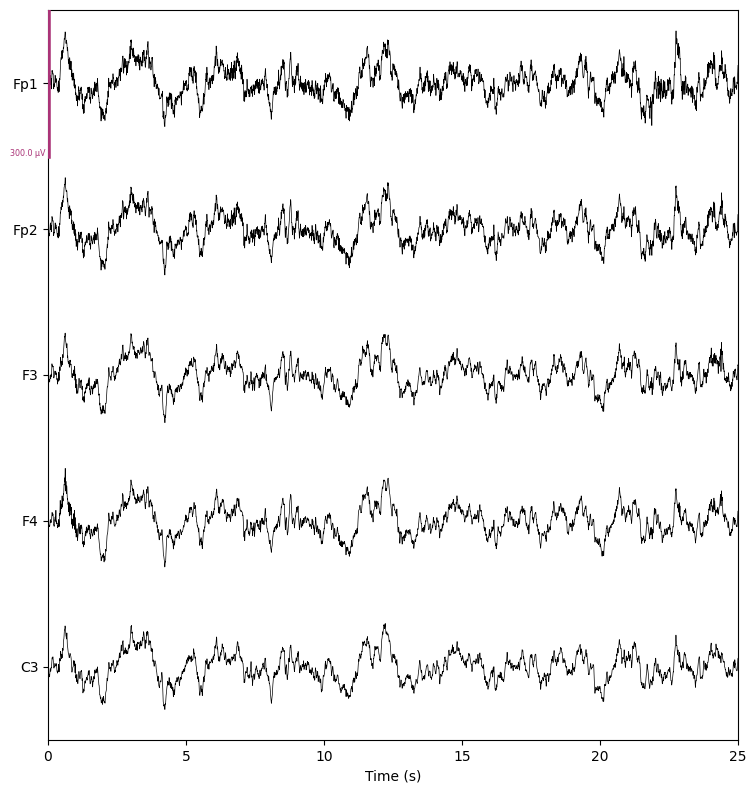

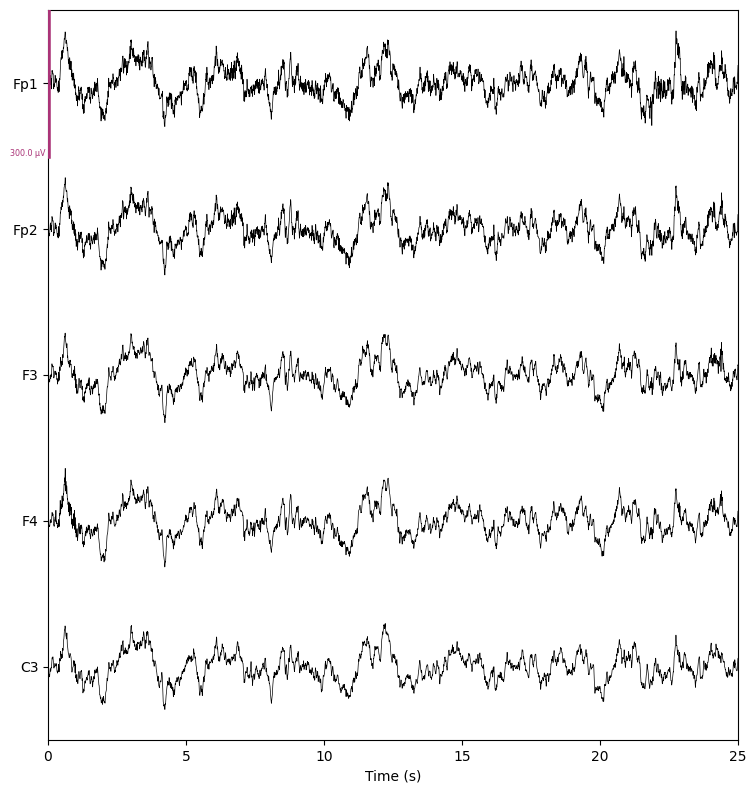

In [15]:
raw.plot(show_scrollbars=False, show_scalebars=True,
         scalings=dict(eeg=15e-5), duration=25, n_channels=5)

### Plot the Data

Data Preprocessed is stored in folder: */derivates*

In [16]:
channels = raw.ch_names
print(channels)

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']


Effective window size : 4.096 (s)


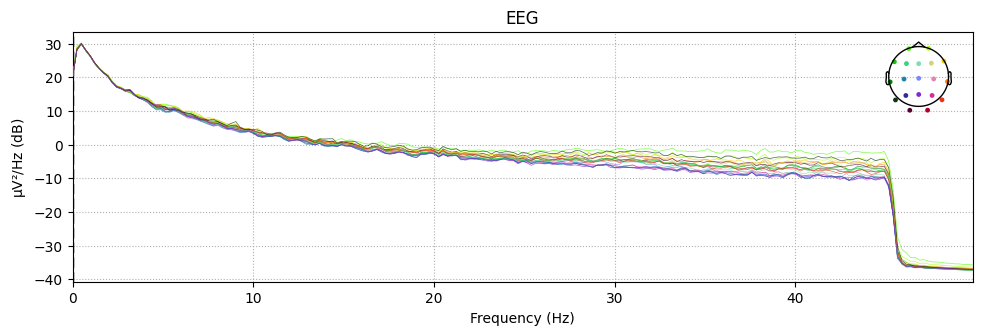

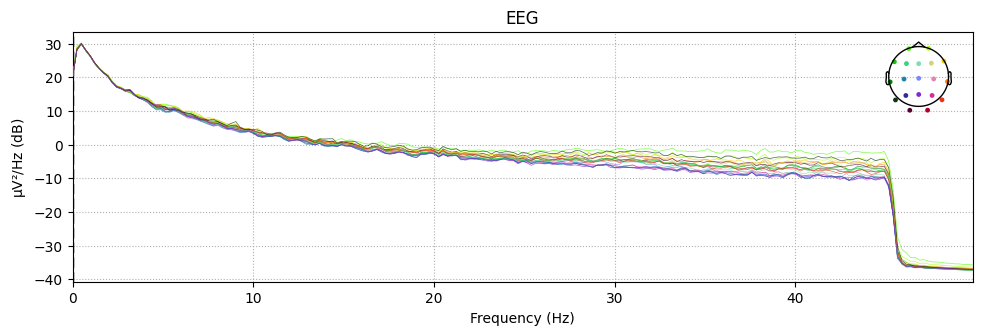

In [17]:
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


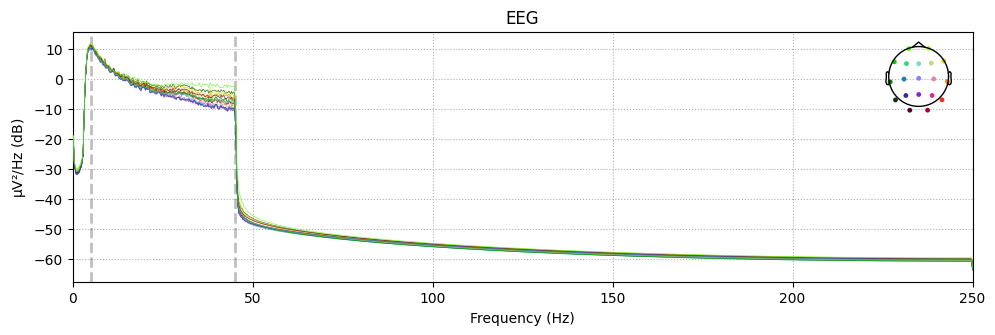

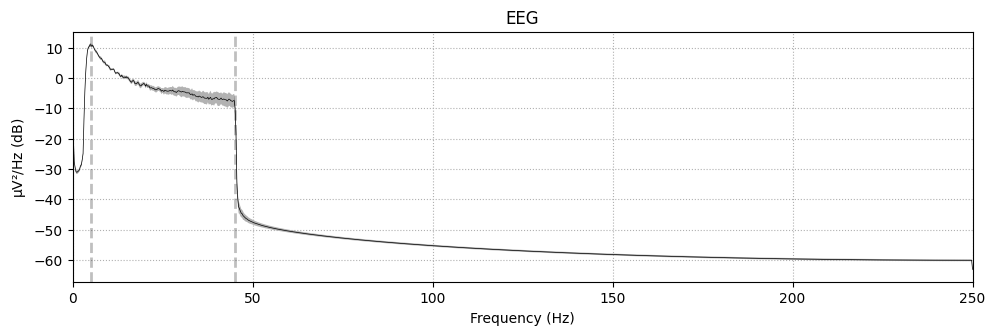

In [18]:
raw_filtered = raw.copy().filter(5,45, verbose=False);
raw_filtered.compute_psd().plot(picks='data', exclude='bads');
raw_filtered.compute_psd().plot(picks='data', exclude='bads',average=True);

### ICA Components

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 2.0s.


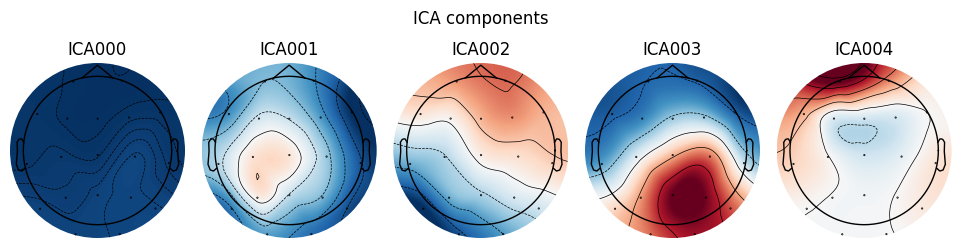

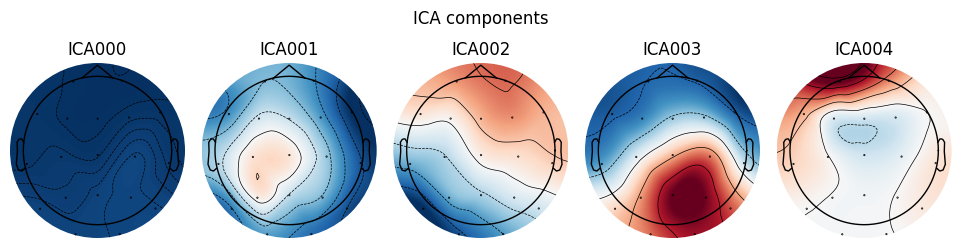

In [19]:
ica = mne.preprocessing.ICA(n_components=5, random_state=42)
ica.fit(raw.copy().filter(5,45, verbose=False))
ica.plot_components()

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 6.3s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
299 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
299 matching events found
No baseline correction applied
0 projection items activated


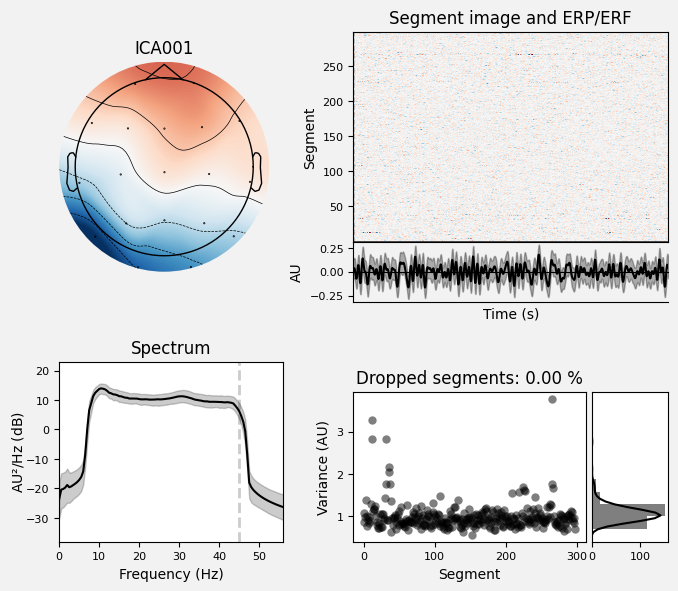

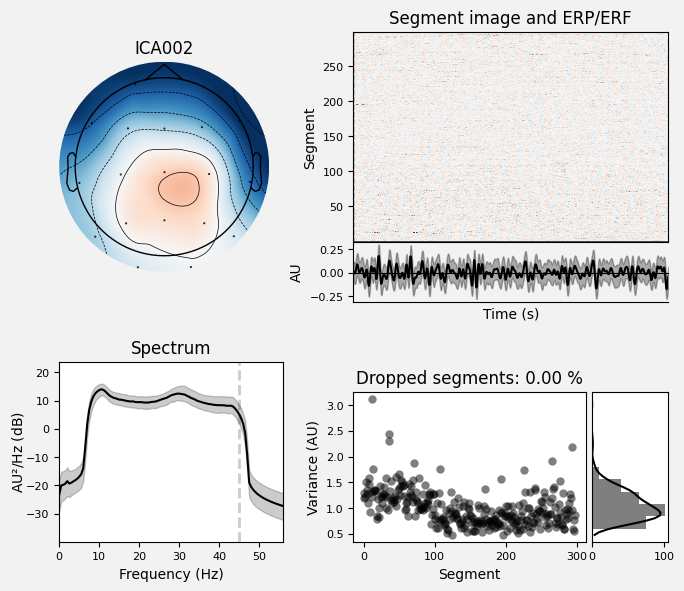

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [20]:
ica.fit(raw.filter(10,45, verbose=False))
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

### EEG Events

In [21]:
print(channels)

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']


In [25]:
events = mne.find_events(raw, stim_channel="Fp1")
print(events[:5])  # show the first 5

[]


In [48]:
eeg_data = raw.get_data()
mean = eeg_data.mean()
std = eeg_data.std()
print("Mean:",mean)
print("Std:", std)

threshold = mean+(0.5*std)

crossings = (raw.get_data()[0]> threshold).astype(int)
diff = np.diff(crossings)
event_onsets = np.where(diff == 1)[0]+1

event_durations = np.ones_like(event_onsets)*200

event_descriptions = ['Event']*len(event_onsets)

annotations = mne.Annotations(onset=event_onsets, duration=event_durations, description=event_descriptions)

raw.set_annotations(annotations)

events, event_id = mne.events_from_annotations(raw)

print(events)

Mean: 1.2032555663483362e-10
Std: 4.697702331359037e-06
Used Annotations descriptions: ['Event']
[[   500      0      1]
 [  9000      0      1]
 [ 17500      0      1]
 [ 27500      0      1]
 [ 35000      0      1]
 [ 62000      0      1]
 [ 75500      0      1]
 [ 88000      0      1]
 [ 94000      0      1]
 [111500      0      1]
 [124000      0      1]
 [132000      0      1]
 [138000      0      1]
 [145000      0      1]
 [153000      0      1]
 [169000      0      1]
 [176500      0      1]
 [188000      0      1]
 [195000      0      1]
 [201000      0      1]
 [208000      0      1]
 [215000      0      1]
 [221500      0      1]
 [230000      0      1]
 [238500      0      1]
 [245000      0      1]
 [252000      0      1]
 [259000      0      1]
 [275500      0      1]
 [294000      0      1]
 [299000      0      1]]


<ipython-input-48-c23cd63a2337>:19: RuntimeWarning: Omitted 13600 annotation(s) that were outside data range.
  raw.set_annotations(annotations)
<ipython-input-48-c23cd63a2337>:19: RuntimeWarning: Limited 12 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


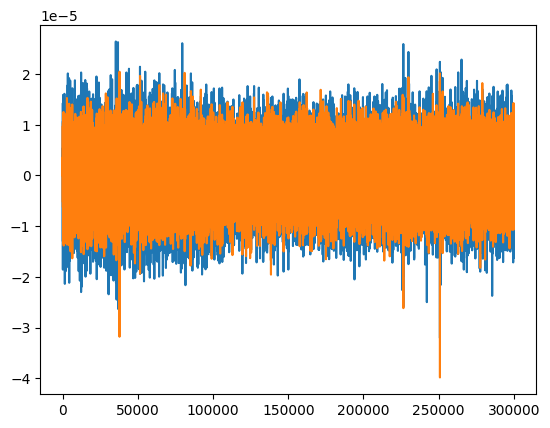

In [40]:
plt.plot(raw.copy().get_data()[1])
plt.plot(raw.copy().filter(5,45, verbose=False).get_data()[5])

In [95]:
new_events = mne.make_fixed_length_events(raw, start=0, duration=5.0, overlap=1)

event_label = 1
num_events = new_events.shape[0]
event_ids = np.arange(num_events) + event_label
new_events[:, 2] = event_ids


print(new_events.shape)
new_events[:15]

(149, 3)


array([[    0,     0,     1],
       [ 2000,     0,     2],
       [ 4000,     0,     3],
       [ 6000,     0,     4],
       [ 8000,     0,     5],
       [10000,     0,     6],
       [12000,     0,     7],
       [14000,     0,     8],
       [16000,     0,     9],
       [18000,     0,    10],
       [20000,     0,    11],
       [22000,     0,    12],
       [24000,     0,    13],
       [26000,     0,    14],
       [28000,     0,    15]])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


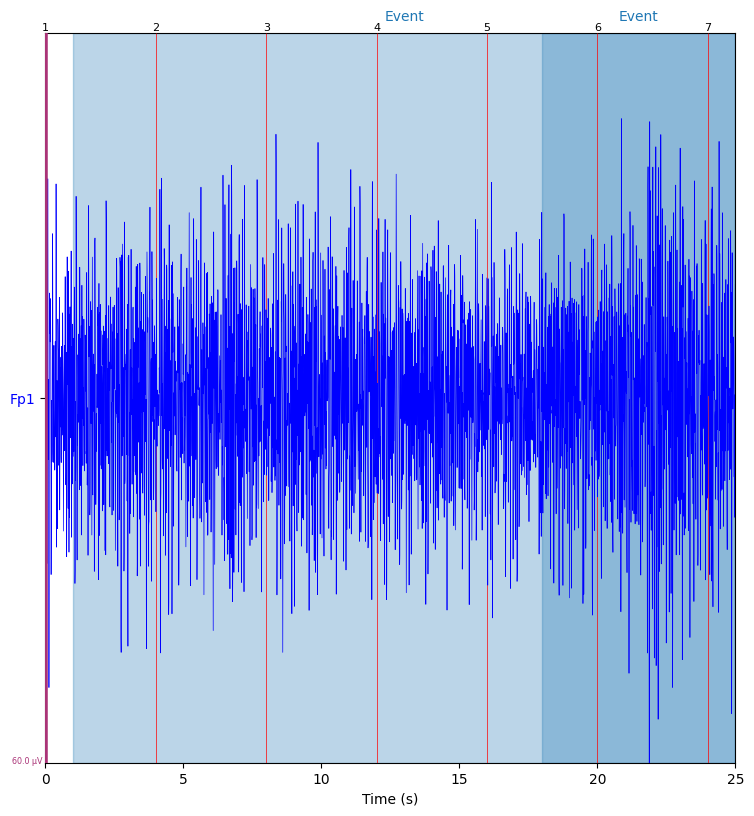

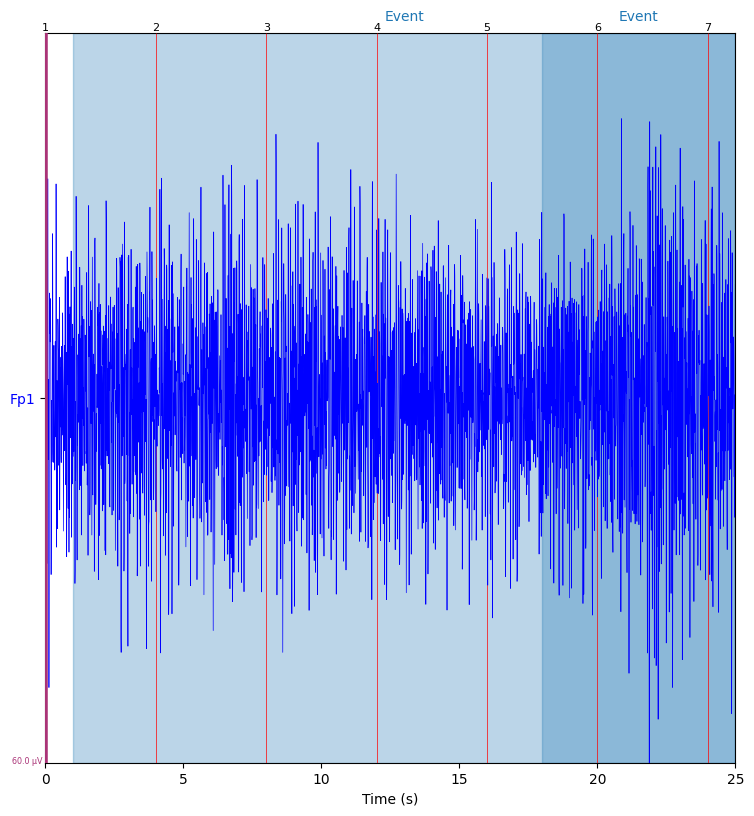

In [102]:
raw.copy().pick_channels(['Fp1']).plot(
    events=new_events,
    scalings=dict(eeg=3e-5),
    start=0,
    duration=25,
    color="blue",
    event_color="r",
    show_scrollbars=False, show_scalebars=True
)

### Epochs

In [118]:
n_times = 1024  # Just over 1 second epochs
n_epochs = 50
sfreq = raw.info['sfreq']

epochs = mne.Epochs(
    raw.copy().pick_channels(['Fp1']),
    new_events,
    tmin=0,
    tmax= n_times / sfreq,
    baseline=None
)

epochs

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
149 matching events found
No baseline correction applied
0 projection items activated


Number of events,149
Events,1: 110: 1100: 1101: 1102: 1103: 1104: 1105: 1106: 1107: 1108: 1109: 111: 1110: 1111: 1112: 1113: 1114: 1115: 1116: 1117: 1118: 1119: 112: 1120: 1121: 1122: 1123: 1124: 1125: 1126: 1127: 1128: 1129: 113: 1130: 1131: 1132: 1133: 1134: 1135: 1136: 1137: 1138: 1139: 114: 1140: 1141: 1142: 1143: 1144: 1145: 1146: 1147: 1148: 1149: 115: 116: 117: 118: 119: 12: 120: 121: 122: 123: 124: 125: 126: 127: 128: 129: 13: 130: 131: 132: 133: 134: 135: 136: 137: 138: 139: 14: 140: 141: 142: 143: 144: 145: 146: 147: 148: 149: 15: 150: 151: 152: 153: 154: 155: 156: 157: 158: 159: 16: 160: 161: 162: 163: 164: 165: 166: 167: 168: 169: 17: 170: 171: 172: 173: 174: 175: 176: 177: 178: 179: 18: 180: 181: 182: 183: 184: 185: 186: 187: 188: 189: 19: 190: 191: 192: 193: 194: 195: 196: 197: 198: 199: 1
Time range,0.000 – 2.048 s
Baseline,off


In [130]:
epochs = mne.make_fixed_length_epochs(raw.copy().pick_channels(['Fp1']), duration=5, preload=False)
epochs

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


Number of events,119
Events,1: 119
Time range,0.000 – 4.998 s
Baseline,off


Using data from preloaded Raw for 9 events and 2500 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 9 events and 2500 original time points ...


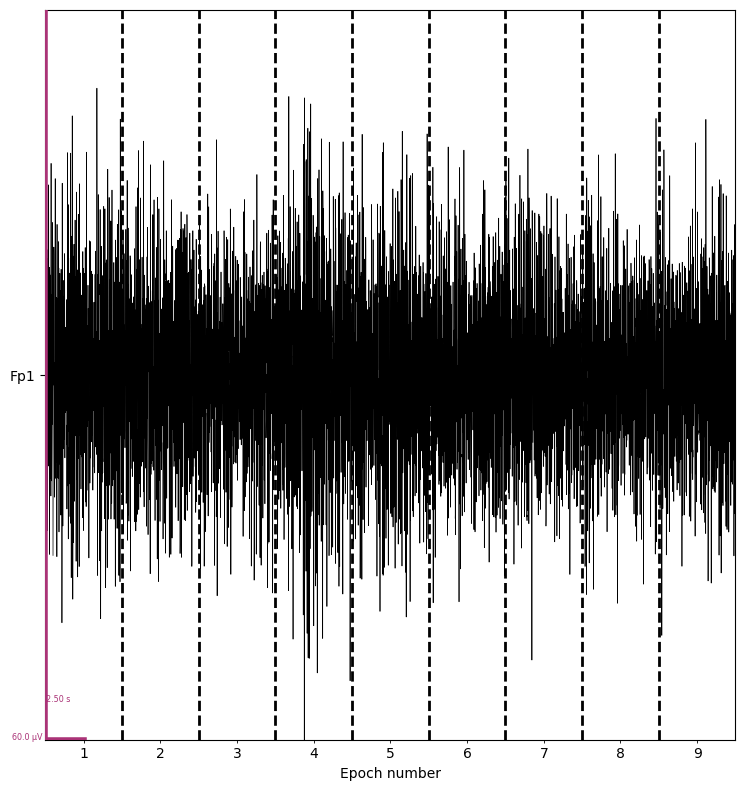

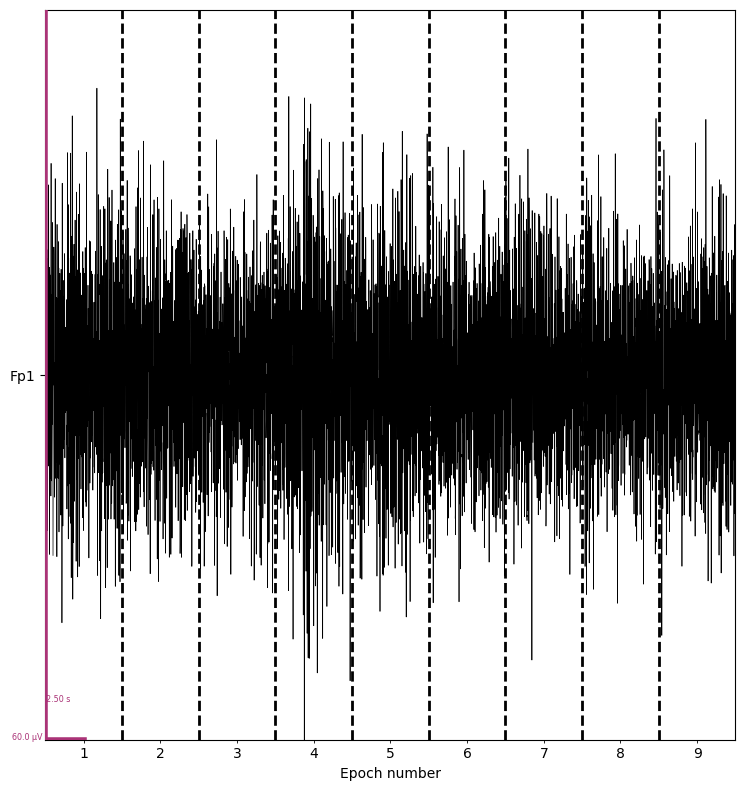

In [139]:
catch_trials_and_buttonpresses = mne.pick_events(new_events, include=[1,2,3])
epochs[1:10].plot(
    events=catch_trials_and_buttonpresses,
    event_id=event_id,
    scalings=dict(eeg=3e-5),
    show_scrollbars=False, show_scalebars=True
)

# Combine Raw Data

In [142]:
path = "/content/alzheimer_dataset/derivatives/sub-001/eeg/"
filename = "sub-001_task-eyesclosed_eeg.set"
raw1 = mne.io.read_raw_eeglab(path+filename, preload=True)
participant_info = {'id': 'sub-001'}
raw1.info['subject_info'] = participant_info

path = "/content/alzheimer_dataset/derivatives/sub-002/eeg/"
filename = "sub-002_task-eyesclosed_eeg.set"
raw2 = mne.io.read_raw_eeglab(path+filename, preload=True)
participant_info = {'id': 'sub-002'}
raw2.info['subject_info'] = participant_info

raw_data_list = []
raw_data_list.append(raw1.pick_channels(['Fp1']))
raw_data_list.append(raw2.pick_channels(['Fp1']))

combined_raw_data = mne.concatenate_raws(raw_data_list)
combined_raw_data.info

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<Info | 9 non-empty values
 bads: []
 ch_names: Fp1
 chs: 1 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 500.0 Hz
 subject_info: 1 item (dict)
>

In [143]:
for i in range(15):
  f = 'sub'
  print(f+str(i+1).zfill(3))

sub001
sub002
sub003
sub004
sub005
sub006
sub007
sub008
sub009
sub010
sub011
sub012
sub013
sub014
sub015


In [144]:
combined_raw_data.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [145]:
combined_raw_data.info['subject_info']

{'id': 'sub-001'}

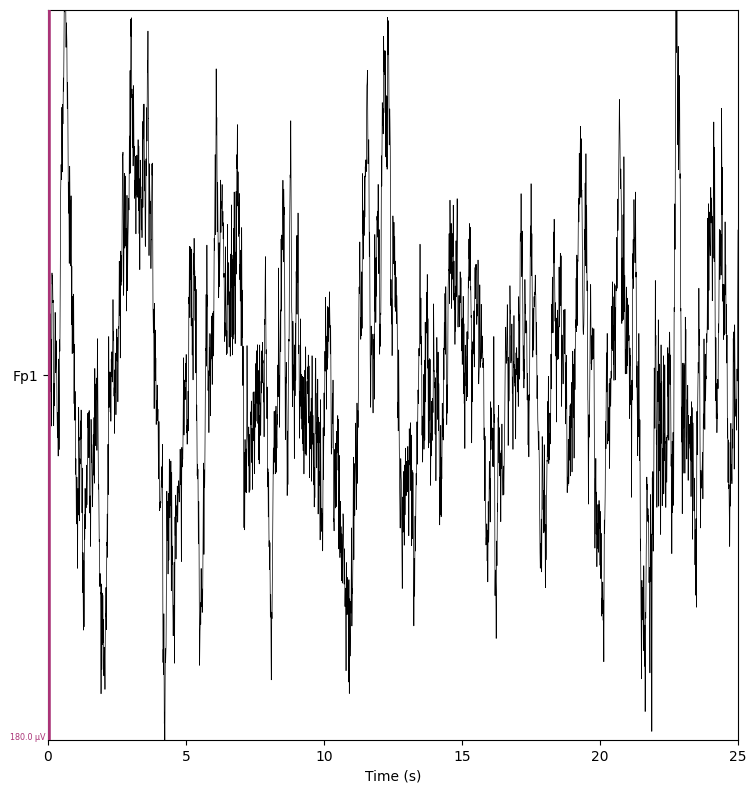

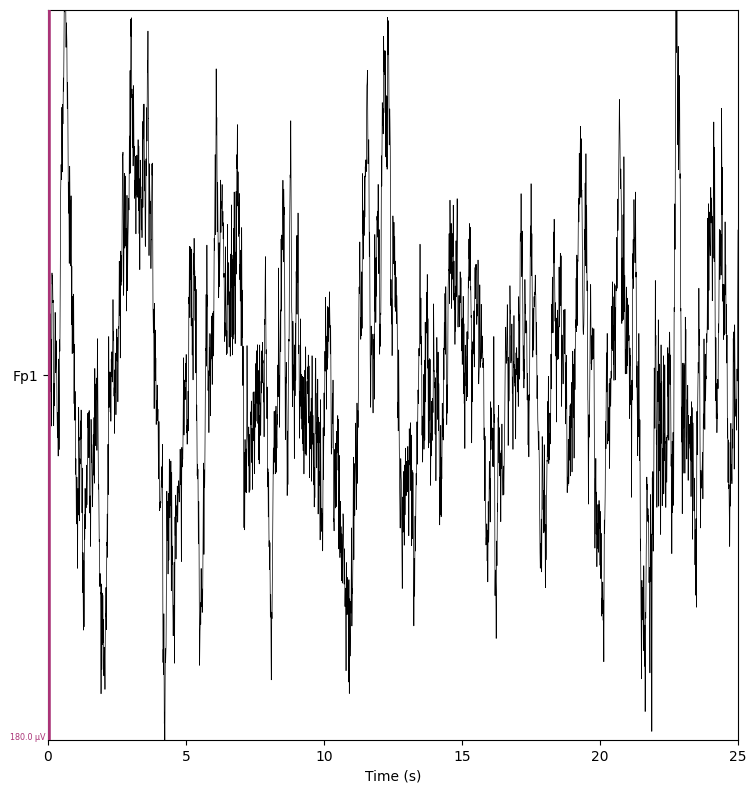

In [151]:
combined_raw_data.plot(show_scrollbars=False, show_scalebars=True,
    scalings=dict(eeg=9e-5), duration=25)